<a href="https://colab.research.google.com/github/Breakrule/Python-Project/blob/main/model00s5w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Latihan 01

Pada latihan ini, kita akan mencoba mencoba membedakan dua jenis gambar, gambar 5 dan s terbalik menggunakan Convolutional Neural Network (CNN) sederhana.

Latihan ini menggunakan teknik klasifikasi secara biner, alias hanya bisa membedakan 2 jenis kategori. Teknik untuk mengenali pattern gambar lebih dari 2 kategori akan dibahas di akhir kode.

## Install Library

Pertama, mari kita install library Augmentor terlebih dahulu

In [ ]:
!pip install Augmentor

## Download File

Jalankan perintah berikut untuk mendownload file `Latihan 1.zip` dari link google drive yang sudah dibagikan. Perintah `gdown` digunakan untuk mendownload file google drive yang sudah tershare secara publik dengan cara memanggil `id` file tersebut.

In [ ]:
!cp "/content/drive/My Drive/ta/dataset.zip" .
!unzip dataset.zip

Archive:  dataset.zip
replace dataset/train/5/lima.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/train/5/lima.png  
  inflating: dataset/train/s/s.png   
  inflating: dataset/train/w/w.png   


## Persiapan Dataset

Persiapankan dataset test dengan menyalin file `5.png` dan `s.png` ke folder test.

In [ ]:
!cp dataset/train/5/lima.png /content/dataset/test/5/
!cp dataset/train/s/s.png /content/dataset/test/s/
!cp dataset/train/w/w.png /content/dataset/test/w/

Sekarang, mari perbanyak masing-masing dataset train dan test dengan Augmentor.

In [ ]:
import Augmentor
import os

def perbanyak_(ini, sebanyak_ini):
  source_dir = ini
  output_dir = "."
  p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir)
  p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=13, max_right_rotation=13)
  p.zoom_random(probability=0.5, percentage_area=0.9)
  p.crop_random(probability=0.6, percentage_area=0.9)
  p.resize(probability=1.0, width=64, height=64)

  p.sample(sebanyak_ini)

perbanyak_("dataset/test/5", 30)
perbanyak_("dataset/test/s", 30)
perbanyak_("dataset/test/w", 30)

perbanyak_("dataset/train/5", 270)
perbanyak_("dataset/train/s", 270)
perbanyak_("dataset/train/w", 270)

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F542E6D4BA8>: 100%|██████████| 30/30 [00:00<00:00, 278.57 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F542E6AD438>:  23%|██▎       | 7/30 [00:00<00:00, 88.12 Samples/s]

Initialised with 1 image(s) found.
Output directory set to dataset/test/5/..Initialised with 1 image(s) found.
Output directory set to dataset/test/s/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F542E6D4470>: 100%|██████████| 30/30 [00:00<00:00, 285.76 Samples/s]
Processing <PIL.Image.Image image mode=RGBA size=64x64 at 0x7F542E6BFE48>: 100%|██████████| 30/30 [00:00<00:00, 242.24 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F542E6D43C8>:   1%|          | 3/270 [00:00<00:04, 66.50 Samples/s]

Initialised with 1 image(s) found.
Output directory set to dataset/test/w/..Initialised with 1 image(s) found.
Output directory set to dataset/train/5/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F542E6ADB00>: 100%|██████████| 270/270 [00:00<00:00, 306.85 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F5428E298D0>:   1%|▏         | 4/270 [00:00<00:17, 14.87 Samples/s]

Initialised with 1 image(s) found.
Output directory set to dataset/train/s/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F5428E6D630>: 100%|██████████| 270/270 [00:00<00:00, 286.35 Samples/s]
Processing <PIL.Image.Image image mode=RGBA size=64x64 at 0x7F5428E320B8>:   1%|          | 2/270 [00:00<00:22, 11.75 Samples/s]

Initialised with 1 image(s) found.
Output directory set to dataset/train/w/..

Processing <PIL.Image.Image image mode=RGBA size=64x64 at 0x7F542E6ADC50>: 100%|██████████| 270/270 [00:01<00:00, 262.03 Samples/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Dan jangan lupa, hapuslah file original `5.png` dan `s.png` dari folder `train` untuk kita sisakan file original di folder `test`. Dengan ini kita mendapatkan 270 varian gambar 5 dan 270 varian gambar s untuk training, dan kita juga mendapatkan 31 varian gambar 5 dan 31 varian gambar s untuk testing.

In [ ]:
!rm dataset/train/5/lima.png
!rm dataset/train/s/s.png
!rm dataset/train/w/w.png

rm: cannot remove 'dataset/train/5/lima.png': No such file or directory
rm: cannot remove 'dataset/train/s/s.png': No such file or directory


## FIle Training

Berikut adalah teknik untuk menampilkan 20 file yang ada pada folder `train/5` dan test `test/s`. Gunakan `glob` untuk mengambil daftar file pada suatu folder.

Jika anda menggunakan `jupyter notebook`, maka tambahkanlah baris `%matplotlib inline` di bawah `import matplotlib.pyplot as plt` untuk mengaktifkan penampil fungsi plot pada `notebook` anda.

In [ ]:
import glob
import matplotlib.pyplot as plt
#%matplotlib inline

def tampilkan_6_kali_5_gambar_pada_alamat(ini):
  a = glob.glob(ini)

  w=10
  h=10
  fig=plt.figure(figsize=(8, 8))
  columns = 6
  rows = 5
  for i in range(1, columns*rows +1):
      img = plt.imread(a[i])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()

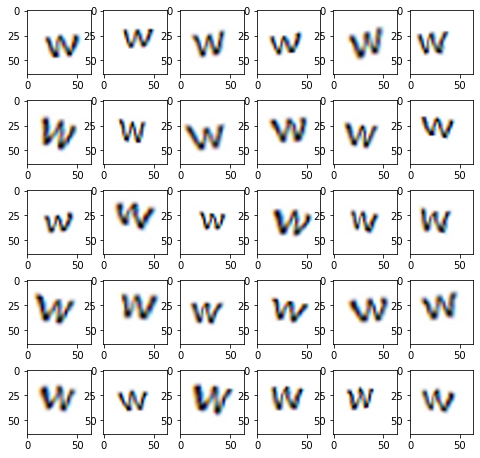

In [ ]:
tampilkan_6_kali_5_gambar_pada_alamat("dataset/train/w/*")

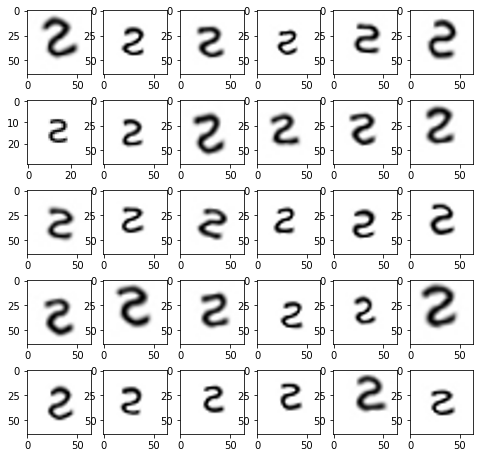

In [ ]:
tampilkan_6_kali_5_gambar_pada_alamat("dataset/test/s/*")

## Fase Training

Pada fase training ini, dipergunakan arsitektur CNN sederhana yang terdiri atas 1 layer konvolusi, 1 layer pooling, 1 layer flatten, yang terkoneksi dengan 2 fully connected layer lainnya.

Hasil akhir penentuan ada pada bagian node paling akhir di mana

`model.add(Dense(units = 1, activation = 'sigmoid'))`

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy


size_ = 16

model = Sequential()

model.add(Conv2D(4, (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = [categorical_accuracy])

Using TensorFlow backend.


Berikut adalah arsitektur akhir CNN yang akan kita pergunakan.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 4)         112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 196)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 1576      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 1,715
Trainable params: 1,715
Non-trainable params: 0
_________________________________________________________________


Sekarang, mari kita set konfigurasi di mana lokasi data train dan data test kita berada.

In [ ]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_data = train.flow_from_directory('dataset/train', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')
test_data = test.flow_from_directory('dataset/test', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')

Found 810 images belonging to 3 classes.
Found 93 images belonging to 3 classes.


Pastikan isi folder `dataset/train`nya hanya terdiri atas 2 folder saja, tanpa ada folder tambahan `.ipynb_checkpoints`.

In [ ]:
!ls -al dataset/train/

total 72
drwxr-xr-x 4 root root  4096 Mar  9 23:02 .
drwxr-xr-x 4 root root  4096 Mar  9 14:48 ..
drwxr-xr-x 2 root root 32768 Jun 17 16:07 5
drwxr-xr-x 2 root root 32768 Jun 17 16:07 s


Sekarang, mari kita train model kita menggunakan 10 kali epoch (perulangan).

In [ ]:
model.fit_generator(train_data, steps_per_epoch = 100, epochs = 100, validation_data = test_data, validation_steps = 100)

Epoch 1/100
100/100 [==============================] - 5s 54ms/step - loss: 1.0807 - categorical_accuracy: 0.4200 - val_loss: 1.0637 - val_categorical_accuracy: 0.5156
Epoch 2/100
100/100 [==============================] - 5s 50ms/step - loss: 0.9674 - categorical_accuracy: 0.6710 - val_loss: 0.9042 - val_categorical_accuracy: 0.8178
Epoch 3/100
100/100 [==============================] - 5s 51ms/step - loss: 0.7885 - categorical_accuracy: 0.8590 - val_loss: 0.7065 - val_categorical_accuracy: 0.8712
Epoch 4/100
100/100 [==============================] - 5s 49ms/step - loss: 0.5181 - categorical_accuracy: 0.9232 - val_loss: 0.4204 - val_categorical_accuracy: 0.9145
Epoch 5/100
100/100 [==============================] - 5s 50ms/step - loss: 0.2951 - categorical_accuracy: 0.9492 - val_loss: 0.1943 - val_categorical_accuracy: 0.9465
Epoch 6/100
100/100 [==============================] - 5s 50ms/step - loss: 0.1867 - categorical_accuracy: 0.9630 - val_loss: 0.1535 - val_categorical_accuracy:

Seperti yang bisa dilihat, jika model anda sudah benar, maka seharusnya nilai akurasi akan meningkat perlahan hingga mendekati 1.000 (alias 100%).

## Fase Testing

Pada fase ini, mari kita test keakuratan model yang sudah kita buat, apakah dia benar-benar bisa mengenali gambar `5` dan `s` dengan benar. Mari kita ambil 2 contoh file yang akan kita coba test keakuratan modelnya.



In [ ]:
a = "dataset/test/5/lima.png"
b = "dataset/test/s/s.png"
c = "dataset/test/w/w.png"

Berikut adalah isi kedua gambar yang akan kita test.

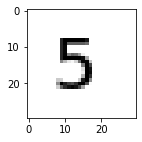

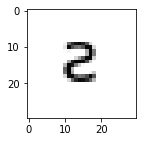

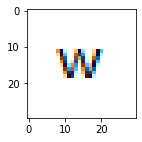

In [ ]:
def tampilkan_(ini):
  fig = plt.figure(figsize=(2, 2))
  img = plt.imread(ini)
  plt.imshow(img)
  plt.show()

tampilkan_(a)
tampilkan_(b)
tampilkan_(c)

Karena hasil prediksi dalam bentuk angka, maka kita perlu membangun kamus, yang mana hasil prediksi tadi yang masih berupa angka, ditautkan dengan nama sebenarnya. Berikut adalah teknik membangun kamus tersebut.

In [ ]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

nama_train_data = switch_dict_key_values(train_data.class_indices)
print(nama_train_data)

{0: '5', 1: 's', 2: 'w'}


Sekarang terlihat bahwa `0` merepresentasikan `5` dan `1` merepresentasikan `s`.

Untuk test pertama kita, mari kita coba `5` terlebih dahulu.

In [ ]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(a, target_size = (size_, size_))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

hasil = model.predict_classes(img)
print("File gambar [", a, "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")

File gambar [ dataset/test/5/lima.png ] diprediksi sebagai [0] alias terbaca sebagai ::  5 .


Untuk test kedua kita, mari kita coba `s` sebagai file testing.

In [ ]:
img = image.load_img(b, target_size = (size_, size_))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

hasil = model.predict_classes(img)
print("File gambar [", b, "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")

File gambar [ dataset/test/s/s.png ] diprediksi sebagai [1] alias terbaca sebagai ::  s .


In [ ]:
img = image.load_img(c, target_size = (size_, size_))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

hasil = model.predict_classes(img)
print("File gambar [", c, "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")

File gambar [ dataset/test/w/w.png ] diprediksi sebagai [2] alias terbaca sebagai ::  w .


In [ ]:
lol = glob.glob("dataset/test/5/*.png")

total = 0
for haha in lol:
  img = image.load_img(haha, target_size = (16, 16))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  #print("File gambar [s] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0][0]], ".")
  total += (0 == hasil[0])*1
print(total/len(lol))

1.0


In [ ]:
lol = glob.glob("dataset/test/s/*.png")

total = 0
for haha in lol:
  img = image.load_img(haha, target_size = (16, 16))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  #print("File gambar [s] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0][0]], ".")
  total += (1 == hasil[0])*1
print(total/len(lol))

1.0


## Kasus Non-Binary

Bagaimana jika data yang ingin kita prediksi jenisnya jumlahnya ada lebih dari 2? Untuk kasus seperti ini, kita perlu mengganti mode dari `binary` menjadi `categorical`.

### 1. Bagian Import
Berikut baris yang perlu anda tambahkan pada bagian `import`.

`from keras.metrics import categorical_accuracy`

### 2. Bagian Training

Pada bagian `activation`, ganti isi `units` dengan jumlah kategori yang ingin prediksi jenisnya. Jika anda menginginkan model anda dapat memprediksi 10 jenis gambar yang berbeda, maka gantilah menjadi 10. Adapun bagian `activation`, cobalah untuk menggantinya dengan `softmax`.

`model.add(Dense(units = 10, activation = 'softmax'))`

Pada bagian `model.compile`, gunakan categorical pada parameter-parameternya.

`model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = [categorical_accuracy])`

### 3. Bagian Konfigurasi Lokasi Folder

Pada bagian konfigurasi lokasi folder, gantilah setiap `train` dan `test` dari `binary` menjadi `categorical`.

`train_data = train.flow_from_directory('dataset/train', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')`

`test_data = test.flow_from_directory('dataset/test', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')`

Akhir kata, selamat mencoba.